In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)
trees_in_yards=np.random.randint(5,20,25).astype(float)
co2_level=2*trees_in_yards+3+np.random.normal(1,5,25).astype(float)

trees_in_yards[13]=np.nan
trees_in_yards[4]=np.nan

raw_data=pd.DataFrame({"Trees": trees_in_yards ,"Co2_level":co2_level})
print("Data",raw_data)

Data     Trees  Co2_level
0    11.0  26.111109
1     8.0  17.861035
2    17.0  35.340913
3    19.0  41.412622
4     NaN  35.110395
5    12.0  24.160117
6    17.0  38.712323
7     9.0  21.826739
8    11.0  31.671696
9    14.0  31.476272
10    7.0  15.374386
11   11.0  35.563856
12   15.0  23.866402
13    NaN  39.597118
14   12.0  31.895963
15    9.0  16.494511
16    8.0  25.651141
17   12.0  29.865595
18   12.0  26.067635
19    7.0  12.206149
20   10.0  26.830564
21    9.0  18.477733
22    6.0   9.110303
23   12.0  26.234417
24   16.0  33.692671


In [ ]:
raw_data.shape
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Trees      23 non-null     float64
 1   Co2_level  25 non-null     float64
dtypes: float64(2)
memory usage: 532.0 bytes


In [ ]:
raw_data.describe()

,Trees,Co2_level
count,23.000000,25.000000
mean,11.478261,26.984467
std,3.527419,8.709234
min,6.000000,9.110303
25%,9.000000,21.826739
50%,11.000000,26.234417
75%,13.000000,33.692671
max,19.000000,41.412622


In [ ]:
raw_data['Trees']=raw_data['Trees'].fillna(raw_data['Trees'].mean())
print(raw_data)

        Trees  Co2_level
0   11.000000  26.111109
1    8.000000  17.861035
2   17.000000  35.340913
3   19.000000  41.412622
4   11.478261  35.110395
5   12.000000  24.160117
6   17.000000  38.712323
7    9.000000  21.826739
8   11.000000  31.671696
9   14.000000  31.476272
10   7.000000  15.374386
11  11.000000  35.563856
12  15.000000  23.866402
13  11.478261  39.597118
14  12.000000  31.895963
15   9.000000  16.494511
16   8.000000  25.651141
17  12.000000  29.865595
18  12.000000  26.067635
19   7.000000  12.206149
20  10.000000  26.830564
21   9.000000  18.477733
22   6.000000   9.110303
23  12.000000  26.234417
24  16.000000  33.692671


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
clean_data=raw_data.copy()
scaler=MinMaxScaler()
clean_data['Trees']=scaler.fit_transform(clean_data[['Trees']])
print(clean_data)

       Trees  Co2_level
0   0.384615  26.111109
1   0.153846  17.861035
2   0.846154  35.340913
3   1.000000  41.412622
4   0.421405  35.110395
5   0.461538  24.160117
6   0.846154  38.712323
7   0.230769  21.826739
8   0.384615  31.671696
9   0.615385  31.476272
10  0.076923  15.374386
11  0.384615  35.563856
12  0.692308  23.866402
13  0.421405  39.597118
14  0.461538  31.895963
15  0.230769  16.494511
16  0.153846  25.651141
17  0.461538  29.865595
18  0.461538  26.067635
19  0.076923  12.206149
20  0.307692  26.830564
21  0.230769  18.477733
22  0.000000   9.110303
23  0.461538  26.234417
24  0.769231  33.692671


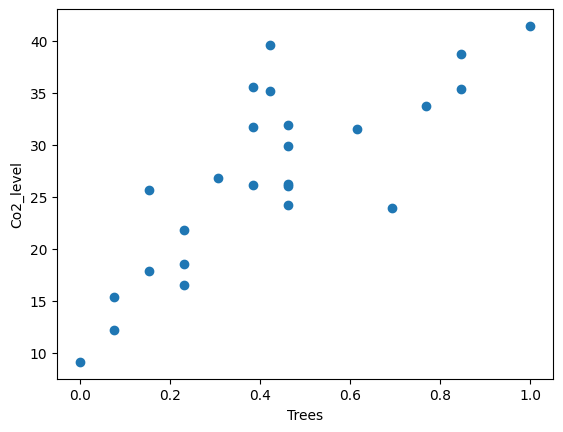

In [ ]:
plt.scatter(clean_data['Trees'],clean_data['Co2_level'])
plt.xlabel('Trees')
plt.ylabel('Co2_level')
plt.show()

Text(0.5, 1.0, 'Trees Distribution')

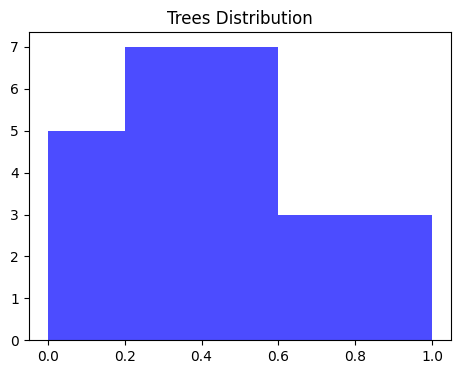

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(clean_data['Trees'],bins=5,color='blue',alpha=0.7)
plt.title("Trees Distribution")


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error ,r2_score

In [ ]:
dataset=clean_data.copy()

In [ ]:
model=LinearRegression()
X=dataset[['Trees']]
y=dataset[['Co2_level']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2 ,random_state=42)

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([[24.95789116],
       [18.46165413],
       [24.95789116],
       [27.12330351],
       [24.95789116]])

In [ ]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print('Mean_squared_error',mse)
print('R2-score',r2)

Mean_squared_error 42.274085962967035
R2-score -1.7301650789633851


In [ ]:
print(f"Intercept:{model.intercept_[0]:.2f}")
print(f"Slope : {model.coef_[0][0]:.2f}")

Intercept:14.13
Slope : 28.15


Text(0.5, 0, 'Tree')

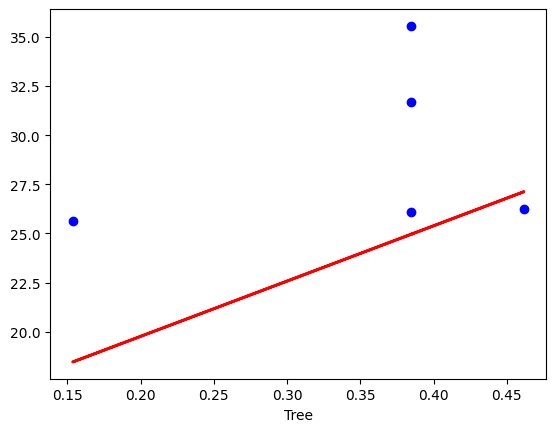

In [ ]:
plt.scatter(X_test,y_test,color='blue',label='Actual_data')
plt.plot(X_test,y_pred,color='red',linewidth=2,label='Regressionline')
plt.xlabel('Tree')